In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
)
from sklearn.decomposition import PCA


In [ ]:

df = pd.read_csv("breast_cancer_dataset.csv")
print(df.head())


  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [4]:
print("Shape:", df.shape)
print("\nDuplicates:", df.duplicated().sum())
print("\nNull Values:\n", df.isnull().sum())
print("\nUnique Values:\n", df.nunique())


Shape: (569, 31)

Duplicates: 0

Null Values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Unique Values:
 diagnosis               

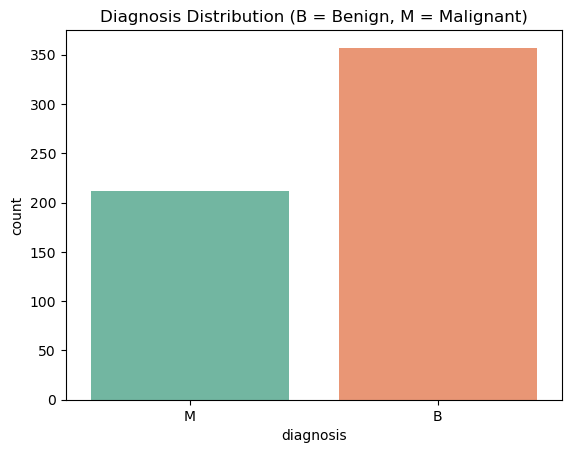

In [ ]:
#  Target Distribution
sns.countplot(x="diagnosis", data=df, palette="Set2")
plt.title("Diagnosis Distribution (B = Benign, M = Malignant)")
plt.show()


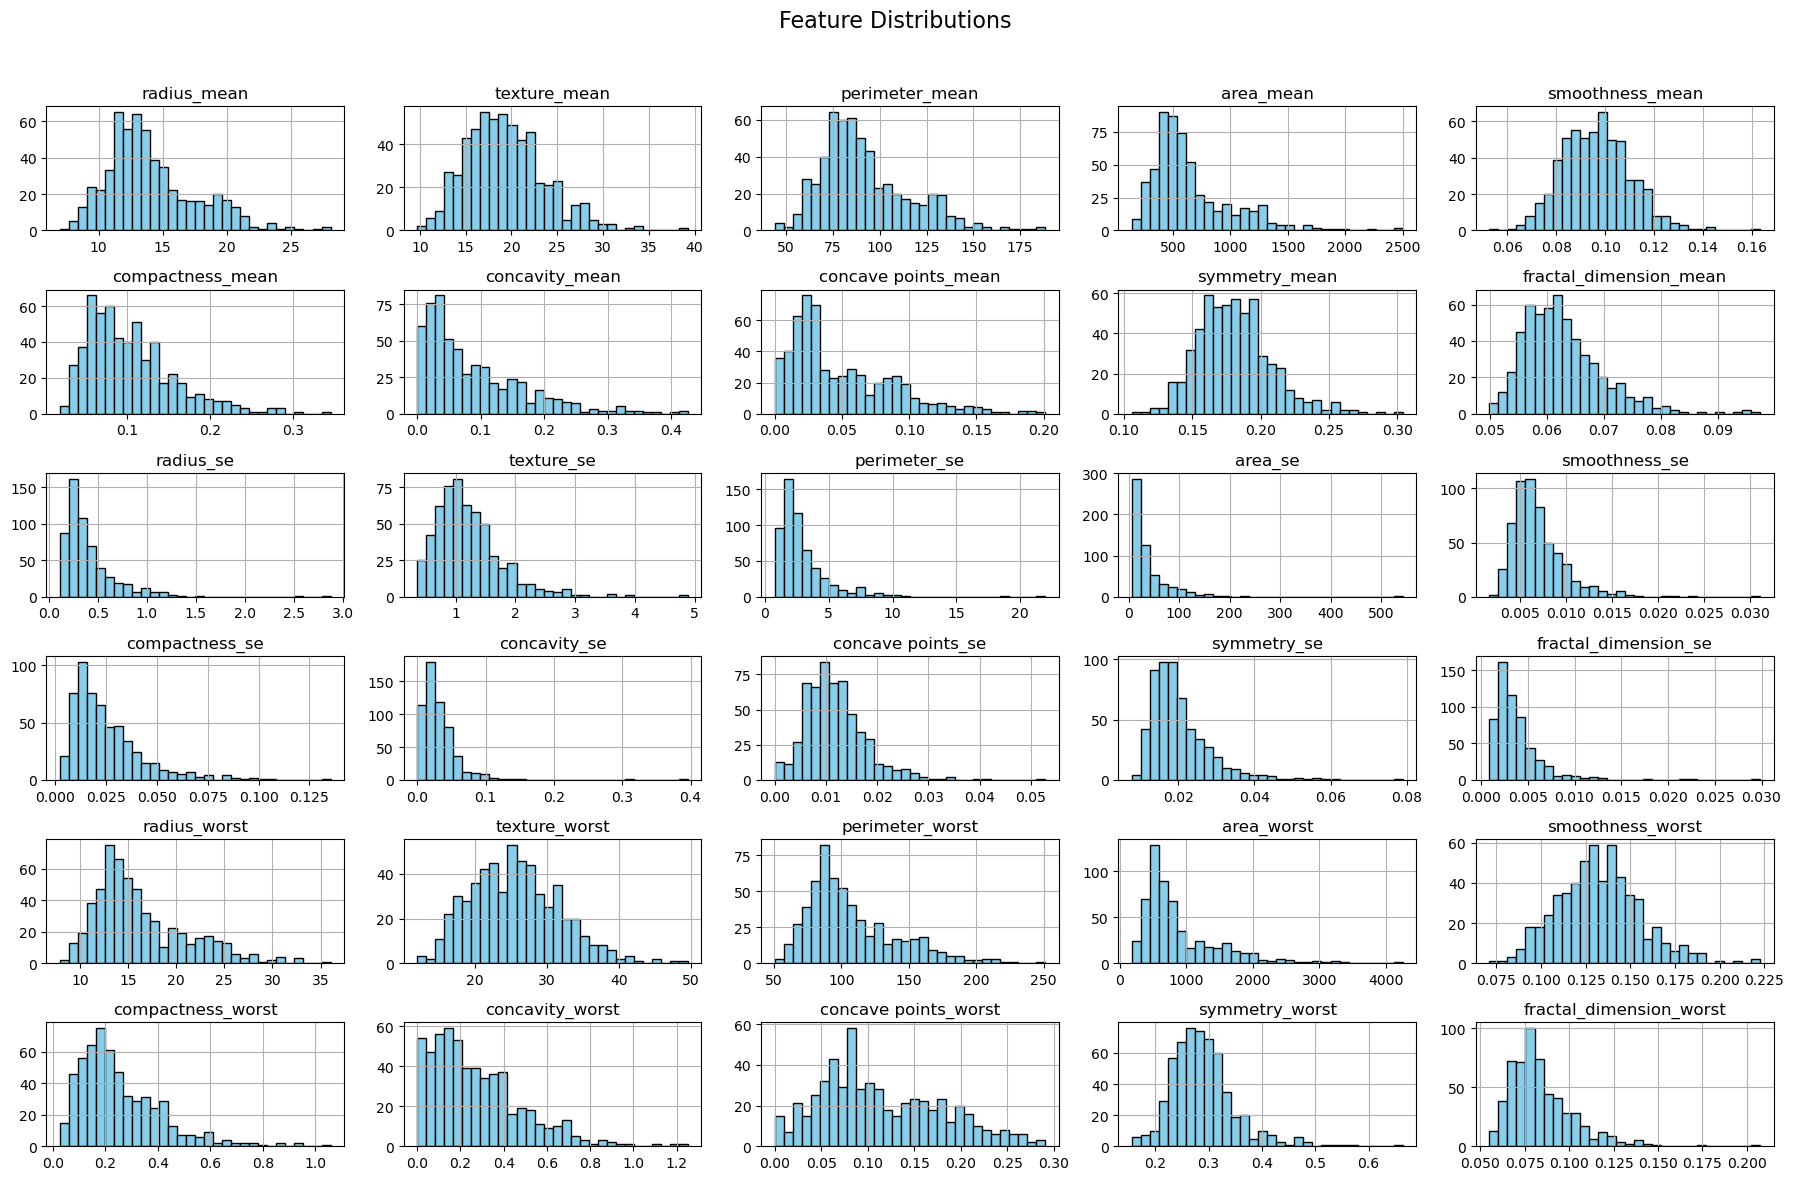

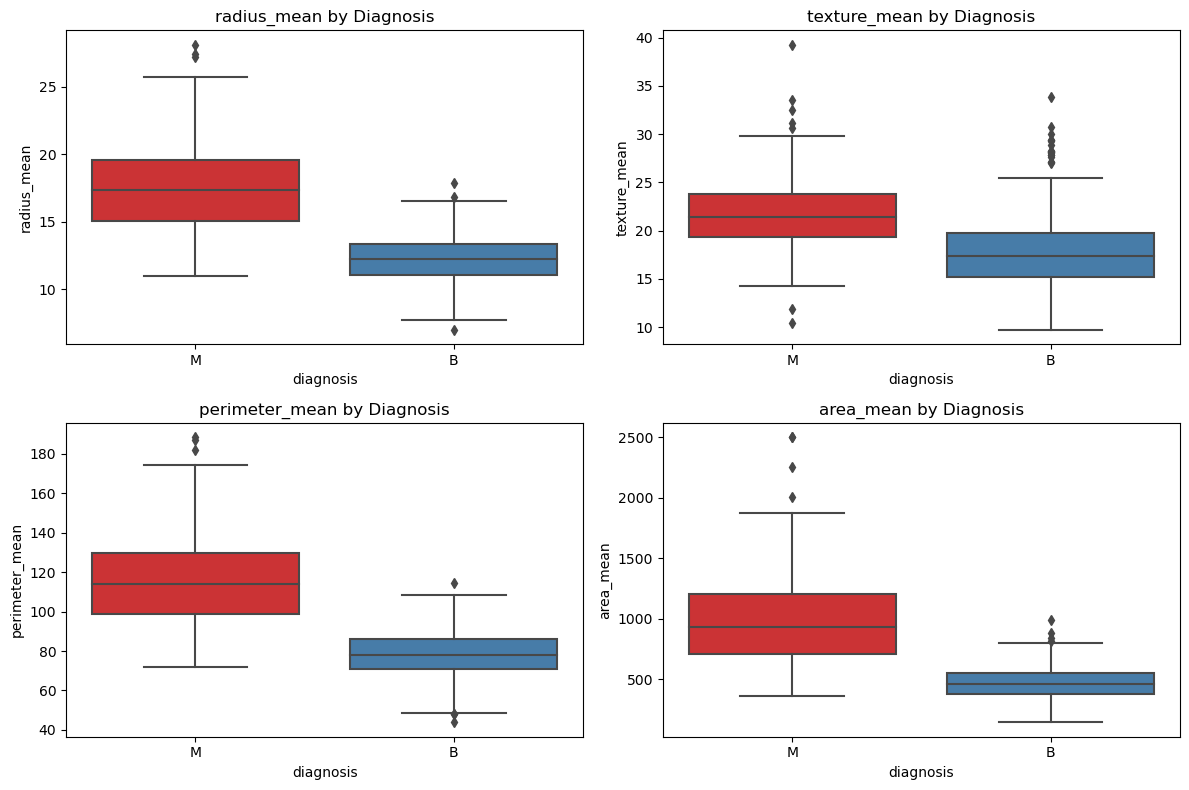

In [ ]:
# EDA 
df.drop("diagnosis", axis=1).hist(
    figsize=(18, 12), bins=30, color="skyblue", edgecolor="black"
)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Boxplots 
selected = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(selected):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x="diagnosis", y=col, palette="Set1")
    plt.title(f"{col} by Diagnosis")
plt.tight_layout()
plt.show()


In [ ]:
# Label encode 
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])  # M=1, B=0

#  scaling
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#  Dimensionality Reduction 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
#  Dataset Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
#  Train SVM 
svm_linear = SVC(kernel="linear")
svm_rbf = SVC(kernel="rbf")
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)


SVC()

In [ ]:
# Model Perdormance 
for model, name in zip([svm_linear, svm_rbf], ["Linear SVM", "RBF SVM"]):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))



Linear SVM Results
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193

RBF SVM Results
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.9736842105263158


In [ ]:
#  Decision Boundary 
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.title(title)
    plt.show()


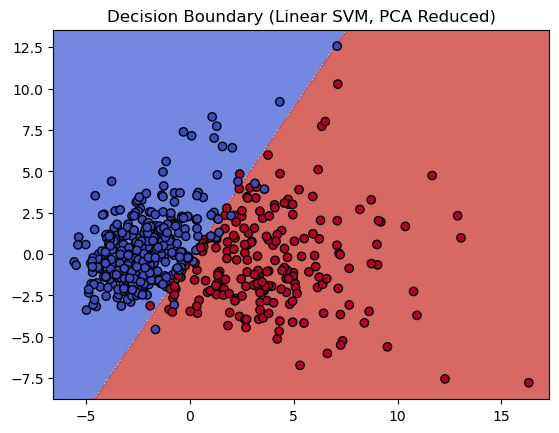


Best Parameters from Grid Search: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
# Reduce dimensionality for plotting decision boundary
svm_2d = SVC(kernel="linear")
svm_2d.fit(X_pca, y)
plot_decision_boundary(svm_2d, X_pca, y, "Decision Boundary (Linear SVM, PCA Reduced)")

#  Hyperparameter Tuning
param_grid = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001], "kernel": ["rbf"]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)
print("\nBest Parameters from Grid Search:", grid.best_params_)


In [ ]:
# Final Evaluation
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nFinal Model Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))



Final Model Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
#  Cross-Validation Score
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))



Cross-Validation Scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean Accuracy: 0.9789318428815401


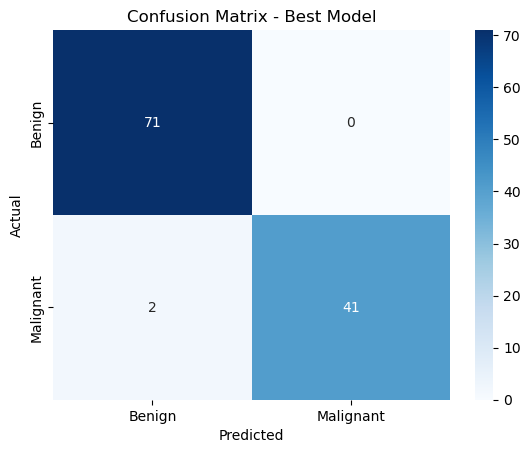

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Benign", "Malignant"],
    yticklabels=["Benign", "Malignant"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model")
plt.show()
